In [1]:
import numpy as np

import matplotlib.pyplot as plt

# Helper Functions

In [2]:
def show2dFunctionOutput(model_function, featureData, labelData, title):
    """display results of arbitrary model function on 2-input (x1,x2) , 1-output (z) graphs"""
    #cutoff = 0.5  # 0.5 for Sigmoid. 0.0 for TANH
    fig, ax = plt.subplots()

    xmin, xmax = np.min(featureData[:, 0]) - 0.1, np.max(featureData[:, 0]) + 0.1
    ymin, ymax = np.min(featureData[:, 1]) - 0.1, np.max(featureData[:, 1]) + 0.1

    # Create filled countour map to color both sides of the boundary
    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x, y)
    grid = np.c_[X.ravel(), Y.ravel()]
    outputs = model_function(grid)  # get predictions
    z = outputs.reshape(X.shape)  # reshape predictions for 2d representation
    plt.contourf(X, Y, z, cmap='YlOrBr')

    # add annotated points to show where the boolean inputs lie on the graph
    c = np.array([[0, 0, 0], [0, 255, 0]])/255  #generates black and green colors
    colors =np.dot(labelData,c[[1],:])+np.dot((1-labelData),c[[0],:])  #assigns colors per boolean label (0=black,1=green)
    ax.scatter(featureData[:, 0], featureData[:, 1], color=colors, alpha=0.5)
    for i, txt in enumerate(labelData):
        ax.annotate(txt.item(), (featureData[i, 0], featureData[i, 1]))

        # adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)
    plt.show()
    
def makeDecisionBoundaryBool2(model, featureData, labelData, title):
    '''Build decision boundary figrue for 2-input, 1-output boolean logic functions
    Note that this assumes a hard sigmoid was used and establishes a cutoff at 0.5
    for predicting 0 or 1'''
    cutoff = 0.5  # 0.5 for Sigmoid. 0.0 for TANH
    fig, ax = plt.subplots()

    xmin, xmax = np.min(featureData[:, 0]) - 0.1, np.max(featureData[:, 0]) + 0.1
    ymin, ymax = np.min(featureData[:, 1]) - 0.1, np.max(featureData[:, 1]) + 0.1

    # Create filled countour map to color both sides of the boundary
    x = np.linspace(xmin, xmax, 200)
    y = np.linspace(ymin, ymax, 200)
    X, Y = np.meshgrid(x, y)
    grid = np.c_[X.ravel(), Y.ravel()]
    preds = model.predict(grid)  # get predictions
    z = preds.reshape(X.shape) > cutoff  # cutoff on predictions to return boolean output
    plt.contourf(X, Y, z, cmap='YlOrBr')

    # add annotated points to show where the boolean inputs lie on the graph
    c = np.array([[0, 0, 0], [0, 255, 0]])/255  #generates black and green colors
    colors =np.dot(labelData,c[[1],:])+np.dot((1-labelData),c[[0],:])  #assigns colors per boolean label (0=black,1=green)
    ax.scatter(featureData[:, 0], featureData[:, 1], color=colors, alpha=0.5)
    for i, txt in enumerate(labelData):
        ax.annotate(txt.item(), (featureData[i, 0], featureData[i, 1]))

        # adjust the axis & add labels for the graph
    plt.axis([xmin, xmax, ymin, ymax])
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.title(title)
    plt.show()
    

# ACTIVATION FUNCTIONS     

def linear(x):
    """returns the linear activation of input structure x (the same values as x)"""
    return x


def heavyside(x):
    """returns the step function values of input structure x"""
    return x>0

def sigmoid(x):
    """Returns the logistic-sigmoided values of input structure x"""
    return 1. / (1. + np.exp(-x))

def relu(x):
    """Returns the rectified linear values of input structure x """
    return np.maximum(0, x)
    
    

# Step 1 (Incomplete - Student Code Required):

We will use a python class definition for the ANN

Student code is required for computing the result of a layer's forward propagation (method = compute_foward in the layer subclass)

In [3]:


class ANN:
    
    data = []
    layers = []
    inputWidth = 1
    outputWidth = 1

    
    class Layer:
        
        
        
        """class defining the elements of an ANN layer"""
        def __init__(self):
            w = []
            b = []
            self.activation_fcn = []
            self.orderNumber = []
            self.previous = None
            self.next = None
            
        def set_weights(self,w,b):
            """set the weights and bias for the layer.  Layer weights should have dimesion: (thislayer_nodecount, previouslayer_nodecount)
            the dimension of the bias should be (thislayer_nodecount,1)"""
            self.w = w
            self.b = b
            return self
        
        def set_activation(self, activation_fcn):
            """ Sets the activation function for this network.  Use before running the network"""
            self.activation_fcn = activation_fcn
            return self
        
        @staticmethod
        def compute_foward(self, inputs):
            """Returns layer ouput from input (shape = [nodeCount, input]) of the weighted input plus bias
            input shape must be [lastlayer_nodeCount, samples] or [featurecount, samplecount] """
            
            net = np.zeros((self.w.shape[0],inputs.shape[1]))  #placeholder for output shape
            layer_out = np.zeros((self.w.shape[0],inputs.shape[1]))  #placeholder for output shape
            
            #########   >> STUDENT CODE -STEP 1- IMPLEMENT THE COMPUTATION OF NET & ACTIVATION <<   ##########
            
            # note... if you forget to do this, your network will return zeros due to the placeholder above

            
            # compute net as the sum of the weigted inputs plus the bias (hint - use linear algebra instead of a loop)
            net = np.dot(self.w, inputs) + self.b
            # compute layer_out using this class' activation function
            layer_out = self.activation_fcn(net)
            
            ##################################################################################################
            
            return layer_out

        
      

    def __init__(self):
        self.data = []
        self.layers = []
        self.inputWidth = 1
        self.outputWidth = 1
        
    def set_input_width(self, inputWidth):
        """defines the input layer width for the network"""
        self.inputWidth = inputWidth
    
    def add_layer(self, nodecount=1, activation_fcn=relu  ):
        """adds a layer to the neural network and returns the layer"""
        oldLayerCount = len(self.layers)
        thislayer = ANN.Layer()        
        thislayer.orderNumber = oldLayerCount+1
        if oldLayerCount > 0:  #other layers have been added already
            
            lastLayer = self.layers[-1]
            thislayer.previous = lastLayer
            lastLayer.next = thislayer
            layerInputSize = lastLayer.w.shape[1]
        else:  #this will be the first layer
            layerInputSize = self.inputWidth
        thislayer.w = np.zeros((layerInputSize,nodecount))
        thislayer.b = np.zeros((1,nodecount))
        thislayer.activation_fcn = activation_fcn
        self.layers = self.layers + [thislayer]
        return thislayer



    # STEP 4
    def forwardPropagation(self, inputs):
        """Compute forward pass of two layer network
        inputs are assumed to be (shape=[sampleCount,featureCount])
        returns a matrix of raw outputs with one row of output per node (shape=[sampleCount, outputNodeCount])
        Internal matrices are shaped for efficiency to avoid internal transposes (columns hold observations/samples) """
        #inputs and outputs will be transposed for efficiency during forwardPropagation and untransposed before returning
        layer_input = inputs.T
        for lnum,layer in enumerate(self.layers):
            layer_out = layer.compute_foward(layer, layer_input)
            layer_input = layer_out
        network_output = layer_out.T
        return network_output


    def predict(self, X, threshold=0.5):
        """Compute predictions using forward propagation for single binary classification at threshold
        X is a standard dataFrame without biases (shape=[observationCount,featureCount])
        returns a standard column vector of binary predictions in {0,1}: (shape=[observationCount, 1])"""
        network_output = self.forwardPropagation(X)
        preds = network_output > threshold
        return preds



## Instantiate data

In [4]:
X = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
yAND = np.matrix('0;0;0;1')
yOR = np.matrix('0;1;1;1')
yXOR = np.matrix('0;1;1;0')

# STEP 2 (Incomplete - Student Code Required)

Student should manually set the weights for two layers and their biases to make this work for the network.  

In [5]:
###################-----STUDENT CODE HERE:------###################

# Goal: modify these weights and biases to produce XOR
# Hint - you could think of this network as 3 networked
# perceptrons, each of which solves a boolean logic problem such as OR, & AND.  
# you can also use the weights of the second layer to invert the output from a previous layer to form a NOT
# l1 is the first hidden layer; l2 is the output layer

# "Default" - doesnt work:

# l1_weights = np.array([[1., 1.],
#                    [1., 1.]])   # hidden weights - indices: j,i : shape = [to, from]
# l2_weights = np.array([[1., 1.]])       # output weights - row vector, shape = [to,from]
# l1_bias = np.array([[0.], [0.]])        # hidden biases - column vector, shape = [hiddenNodeCount, 1]
# l2_bias = np.array([[0.]])              # output node bias


#The examples below do work - as will many others.   Pick one to run and uncomment to see it in action


# EXAMPLE 1

l1_weights = np.array([[1., 1.],
               [1., 1.]])   # hidden weights - indices: j,i : shape = [to, from]
l2_weights = np.array([[1., -1.]])       # output weights - row vector, shape = [to,from]
l1_bias = np.array([[-0.5], [-1.5]])        # hidden biases - column vector, shape = [hiddenNodeCount, 1]
l2_bias = np.array([[-0.5]])              # output node bias


# EXAMPLE 2


# l1_weights = np.array([[1., 1.],
#                [-1., -1.]])   # hidden weights - indices: j,i : shape = [to, from]
# l2_weights = np.array([[1., 1.]])       # output weights - row vector, shape = [to,from]
# l1_bias = np.array([[-0.5], [+1.5]])        # hidden biases - column vector, shape = [hiddenNodeCount, 1]
# l2_bias = np.array([[-1.225]])



###################-----END STUDENT CODE--------###################

## Instantiate a model and add layers with the chosen weight & bias information

In [6]:
#instantiate a network object and set weights manually
model = ANN()
model.set_input_width(X.shape[1])
layer1=model.add_layer(nodecount=2,activation_fcn=heavyside)
layer1.set_weights(l1_weights,l1_bias)
layer2 = model.add_layer(nodecount=1, activation_fcn=heavyside)
layer2.set_weights(l2_weights,l2_bias)


# Test to see if XOR works

X 
 [[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

default weights
predictions: 
 [[False]
 [ True]
 [ True]
 [False]]
Predictions correct?: 
 [[ True]
 [ True]
 [ True]
 [ True]]



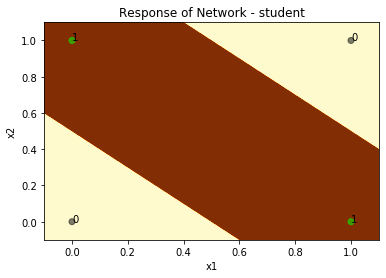

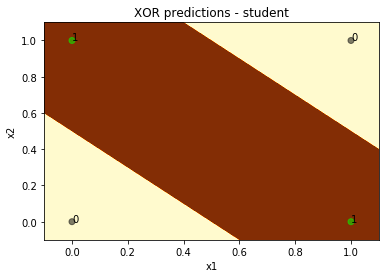

In [8]:
#check only the points of XOR
print("X \n", X)
preds = model.predict(X)
correct = yXOR == preds
print("\ndefault weights")
print("predictions: \n", preds)
print("Predictions correct?: \n", correct)
print()

#show full decision boundary info
show2dFunctionOutput(model.forwardPropagation, X, yXOR, "Response of Network - student")
makeDecisionBoundaryBool2(model, X, yXOR, "XOR predictions - student")